In [187]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imageio.v2 as imageio


In [188]:
def extract_texture_features(imgs):
    """
    Extract texture features using FFT and auto-correlation.

    Args:
        imgs: A list of images.

    Returns:
        feature_vectors: A numpy array of size (N, 2) containing extracted features for N images.
    """
    # Step 2-6: Extract features from each image
    m1_values = []
    m2_values = []
    for img in imgs:
        # Step 2: Compute the 2D Fourier Transform
        fft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
        freq_spectrum = np.fft.fftshift(fft)

        # Step 3: Compute the power spectrum
        power_spectrum = np.abs(freq_spectrum) ** 2

        # Step 4: Apply the logarithmic transform
        log_spectrum = np.log(1 + power_spectrum)

        # Step 5: Compute the autocorrelation function
        autocorr = cv2.matchTemplate(img, img, cv2.TM_CCORR_NORMED)

        # Step 6: Extract m1 and m2 features
        m1 = np.mean(log_spectrum)
        m2 = np.max(autocorr)
        m1_values.append(m1)
        m2_values.append(m2)

    feature_vectors = np.column_stack((m1_values, m2_values))
    
    return feature_vectors

In [189]:
def distance(new_feature, family_feature):
    """
    Calculate the Euclidean distance between a new feature and the mean feature of a family.

    Args:
        new_feature: A numpy array representing the feature of a new image.
        family_feature: A numpy array representing the mean feature of a texture family.

    Returns:
        A numpy array containing the Euclidean distances between the new feature and each feature in the family.
    """
    return np.linalg.norm(new_feature - np.mean(family_feature, axis=0), axis=1)

In [190]:
def plot_images(images, title):
    """
    Plot a set of images in a grid with a shared title.

    Args:
        images (list): A list of image file paths to be plotted.
        title (str): The title to be displayed above the grid of images.

    Returns:
        None.
    """
    plt.figure(figsize=(10, 5))
    plt.suptitle(title)
    for i, img_path in enumerate(images):
        img = imageio.imread(img_path)
        plt.subplot(1, len(images), i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.show()

In [191]:
def plot_test_image(new_image, new_features, wall_features, leaf_features, family1_features, family2_features):
    """
    Plot a test image and its feature vector alongside other texture families.

    Args:
    new_image (numpy.ndarray): The test image to be plotted.
    new_features (list): A list of tuples containing the mean DFT power spectrum and
                         peak auto-correlation values for the test image.
    wall_features (numpy.ndarray): A 2D array of mean DFT power spectrum and peak
                                    auto-correlation values for the wall texture family.
    leaf_features (numpy.ndarray): A 2D array of mean DFT power spectrum and peak
                                    auto-correlation values for the leaf texture family.
    family1_features (numpy.ndarray): A 2D array of mean DFT power spectrum and peak
                                        auto-correlation values for the rock texture family.
    family2_features (numpy.ndarray): A 2D array of mean DFT power spectrum and peak
                                        auto-correlation values for the abstract texture family.

    Returns:
    None
    """
    plt.figure(figsize=(10, 5))
    plt.suptitle('Test image and its feature vector')
    plt.subplot(1, 2, 1)
    plt.imshow(new_image, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.plot(new_features[0][0], new_features[0][1], 'ro', label='Test image')
    plt.plot(wall_features[:, 0], wall_features[:, 1], 'bx', label='Wall texture family')
    plt.plot(leaf_features[:, 0], leaf_features[:, 1], 'gx', label='Leaf texture family')
    plt.plot(family1_features[:, 0], family1_features[:, 1], 'mx', label='Rock texture family')
    plt.plot(family2_features[:, 0], family2_features[:, 1], 'yx', label='Abstract texture family')
    plt.xlabel('Mean DFT power spectrum')
    plt.ylabel('Peak Auto-Correlation')
    plt.grid(True)
    plt.legend()
    plt.subplots_adjust(wspace=0.2, hspace=0.25)
    plt.show()

In [192]:
def plot_distances(wall_distance, leaf_distance, family1_distance, family2_distance):
    """
    Plot the Mahalanobis distances of a test image from different texture families.

    Parameters:
    -----------
    wall_distance: float
        Mahalanobis distance of the test image from the wall texture family.
    leaf_distance: float
        Mahalanobis distance of the test image from the leaf texture family.
    family1_distance: float
        Mahalanobis distance of the test image from the rock texture family.
    family2_distance: float
        Mahalanobis distance of the test image from the abstract texture family.

    Returns:
    --------
    None
    """
    plt.figure(figsize=(10, 5))
    plt.suptitle('Distance of test image from texture families')
    plt.bar(['Wall', 'Leaf', 'Rock', 'Abstract'], [wall_distance, leaf_distance, family1_distance, family2_distance])
    plt.ylabel('Mahalanobis distance')
    plt.subplots_adjust(wspace=0.2, hspace=0.25)
    plt.grid()
    plt.show()

In [193]:
def plot_texture_classification(wall_images, leaf_images, family1_images, family2_images, new_image, wall_features, leaf_features, family1_features, family2_features, new_features, wall_distance, leaf_distance, family1_distance, family2_distance):
    """
    Plots texture classification results including images of each texture family, the test image and its feature vector,
    and a bar plot of the Mahalanobis distance of the test image from each texture family.

    Parameters:
        wall_images (list): List of wall texture images.
        leaf_images (list): List of leaf texture images.
        family1_images (list): List of rock texture images.
        family2_images (list): List of abstract texture images.
        new_image (ndarray): The test image.
        wall_features (ndarray): Array of features for wall texture images.
        leaf_features (ndarray): Array of features for leaf texture images.
        family1_features (ndarray): Array of features for rock texture images.
        family2_features (ndarray): Array of features for abstract texture images.
        new_features (ndarray): Array of features for the test image.
        wall_distance (float): Mahalanobis distance between test image and wall texture family.
        leaf_distance (float): Mahalanobis distance between test image and leaf texture family.
        family1_distance (float): Mahalanobis distance between test image and rock texture family.
        family2_distance (float): Mahalanobis distance between test image and abstract texture family.

    Returns:
        None
    """
    # Plot wall images
    plot_images(wall_images, 'Wall texture images')

    # Plot leaf images
    plot_images(leaf_images, 'Leaf texture images')

    # Plot family1 images
    plot_images(family1_images, 'Rock texture images')

    # Plot family2 images
    plot_images(family2_images, 'Abstract texture images')

    # Plot test image and its feature vector
    plot_test_image(new_image, new_features, wall_features, leaf_features, family1_features, family2_features)

    # Plot distances
    plot_distances(np.mean(wall_distance), np.mean(leaf_distance), np.mean(family1_distance), np.mean(family2_distance))


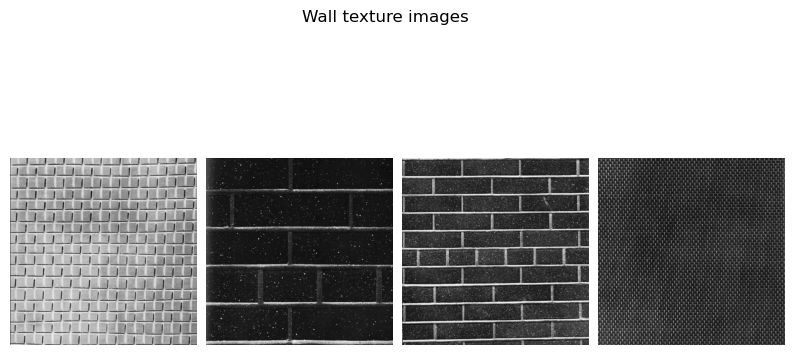

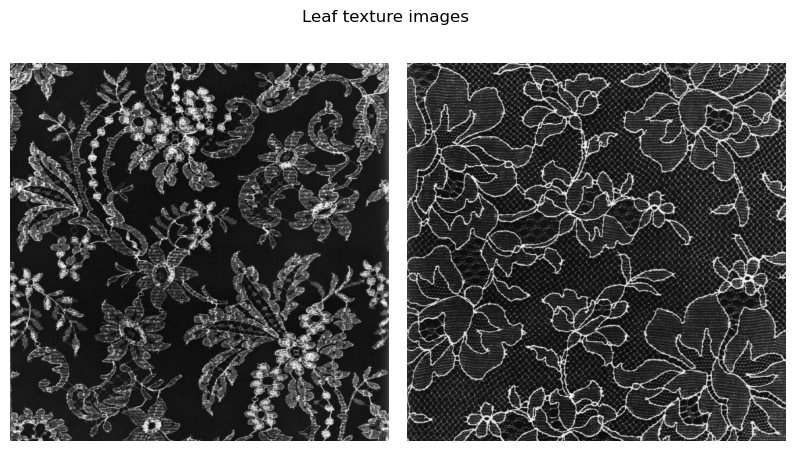

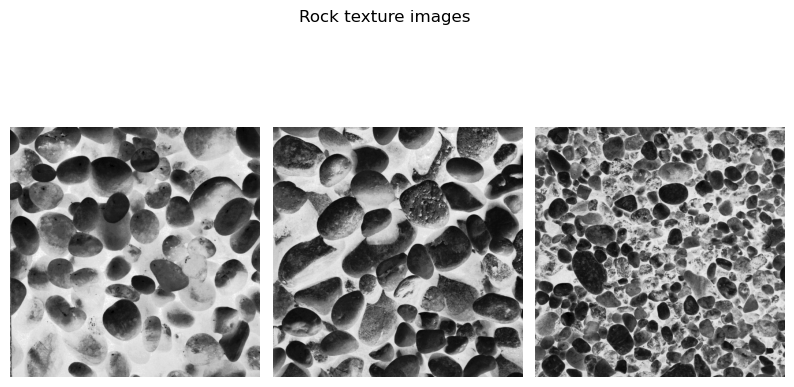

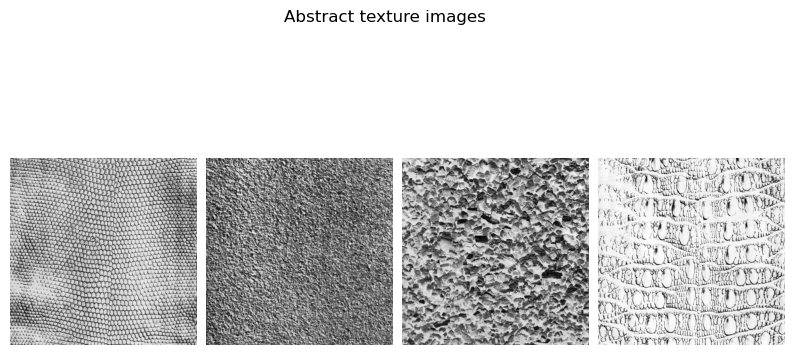

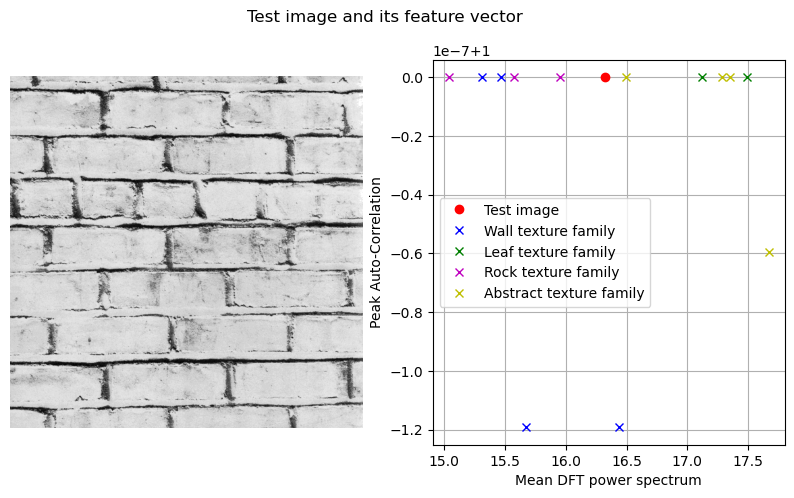

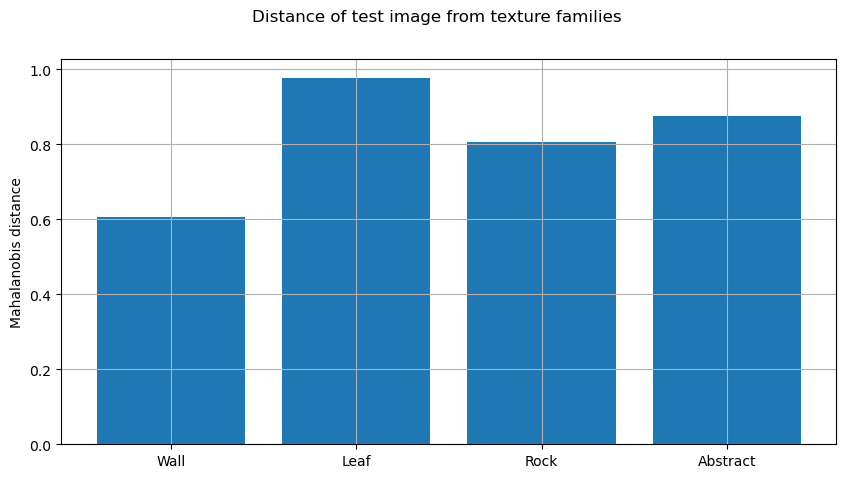

The test image Brodatz/D96.gif belongs to the Wall texture family.


In [242]:
# load the training images for each group
wall_images = ['Brodatz/D1.gif', 'Brodatz/D25.gif', 'Brodatz/D26.gif', 'Brodatz/D6.gif']
leaf_images = ['Brodatz/D40.gif', 'Brodatz/D41.gif']
rocks_images = ['Brodatz/D30.gif', 'Brodatz/D31.gif', 'Brodatz/D23.gif']
abstract_images = ['Brodatz/D3.gif', 'Brodatz/D4.gif', 'Brodatz/D5.gif', 'Brodatz/D10.gif']

wall_features = extract_texture_features([imageio.imread(img) for img in wall_images])
leaf_features = extract_texture_features([imageio.imread(img) for img in leaf_images])
rocks_features = extract_texture_features([imageio.imread(img) for img in rocks_images])
abstract_features = extract_texture_features([imageio.imread(img) for img in abstract_images])

# Step 7: Identify the texture family of a new image based on its distance from the different families
test_image_path = 'Brodatz/D96.gif'
new_image = imageio.imread(test_image_path)
new_features = extract_texture_features([new_image])

# Calculate the distances between the new image and each texture family
wall_distance = distance(new_features, wall_features)
leaf_distance = distance(new_features, leaf_features)
rock_distance = distance(new_features, rocks_features)
abstract_distance = distance(new_features, abstract_features)

# Assign the new image to the family with the minimum distance
distances = [np.min(wall_distance), np.min(leaf_distance), np.min(rock_distance), np.min(abstract_distance)]
family_names = ['Wall', 'Leaf', 'rock', 'abstract']
min_distance = min(distances)
min_index = distances.index(min_distance)
family_name = family_names[min_index]


plot_texture_classification(wall_images, leaf_images, rocks_images, abstract_images, new_image, wall_features, leaf_features, rocks_features, abstract_features, new_features, wall_distance, leaf_distance, rock_distance, abstract_distance)
print('The test image', test_image_path, 'belongs to the', family_name, 'texture family.')